##<font color='gold'> **S1:TRANSITIONING SCALES**
</font>

###<font color='green'> **ONE_FORMER SEGMENTATION MODEL**
</font>

<img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/model_doc/oneformer_architecture.png
" alt="drawing" width="1500"/>


# Official Documentation
https://huggingface.co/docs/transformers/main/en/model_doc/oneformer

###<font color='Green'> **LINK GOOGLE DRIVE**
</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###<font color='Green'> **[** Setup Environment **]**
</font>

In [ ]:
!pip install -q "transformers>=4.44,<5" "huggingface-hub>=0.33.5,<1.0"

###<font color='Green'> **[** Loading Google Street View **]**
</font>

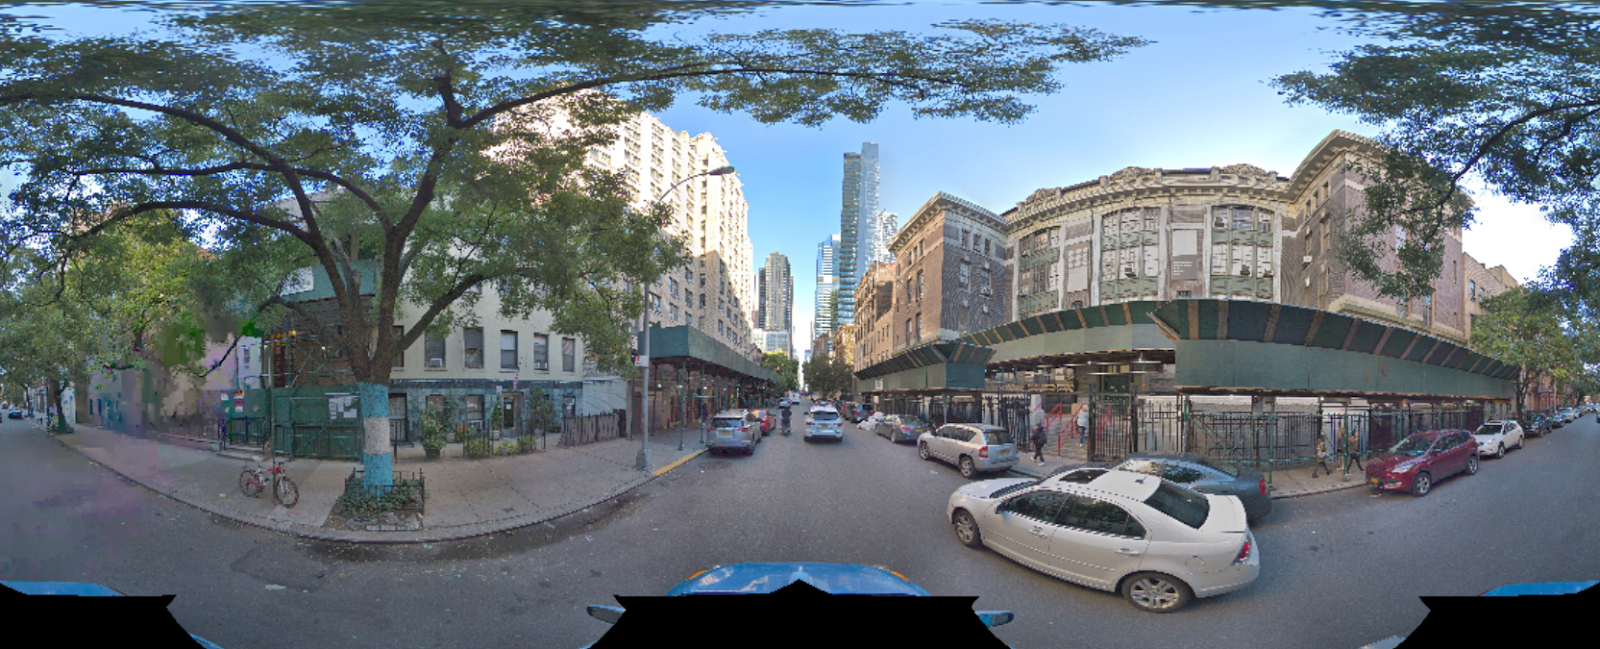

In [ ]:
from PIL import Image
import requests

someSampleImages = [
    "https://1.bp.blogspot.com/-_BWtMqs9QqE/XlVuSzusTbI/AAAAAAAAFXU/FNr-xlxE73QtE4TsxCRbWk4Zwmmd6fP8gCEwYBhgL/s1600/image3.png",
    #"https://cdn.theatlantic.com/thumbor/EkVEoPqKmjspJIj_earZh-nbvKk=/11x28:1130x657/960x540/media/img/mt/2015/12/Screen_Shot_2015_12_10_at_4.00.43_PM/original.png",
    #"https://cdn.images.express.co.uk/img/dynamic/59/590x/secondary/google-maps-how-to-get-street-view-google-maps-2421144.jpg?r=1587143071834",
]

url = someSampleImages[0] #'https://github.com/SerjoschDuering/datasetTest/raw/main/archImage/8_448px-Johnson_House_Lynchburg_Nov_08.JPG'
image = Image.open(requests.get(url, stream=True).raw)
image

###<font color='Green'> **[** Prepare image for the model **]**
</font>

In [ ]:
from transformers import AutoProcessor

# the Auto API loads a OneFormerProcessor for us, based on the checkpoint specified
processor = AutoProcessor.from_pretrained("shi-labs/oneformer_coco_swin_large")

/usr/local/lib/python3.12/dist-packages/transformers/image_processing_base.py:417: UserWarning: The following named arguments are not valid for `OneFormerImageProcessor.__init__` and were ignored: '_max_size', 'reduce_labels'
  image_processor = cls(**image_processor_dict)


The inputs are:


*   The Image
*   The Task (panoptic, instance, semantic)



In [ ]:
# prepare image for the model
image_inputs = processor(images=image, task_inputs=["panoptic"], return_tensors="pt")
for k,v in image_inputs.items():
  print(k,v.shape)

pixel_values torch.Size([1, 3, 540, 1333])
pixel_mask torch.Size([1, 540, 1333])
task_inputs torch.Size([1, 77])


**Load model**

Next, let's load a model from the HuggingFace [hub](https://huggingface.co/models?other=oneformer). Here we load the OneFormer model with a Swin-large backbone

In [ ]:
!pip install --upgrade transformers

In [ ]:
import torch

In [ ]:
from transformers import AutoModelForUniversalSegmentation

model = AutoModelForUniversalSegmentation.from_pretrained("shi-labs/oneformer_coco_swin_large")

###<font color='Green'> **[** Forward Pass : Neural Network **]**
</font>

In [ ]:
import torch

# forward pass
with torch.no_grad():
  outputs = model(**image_inputs)

###<font color='Green'> **[** Visualize Segmentation**]**
</font>

In [ ]:
img_segmentation_results = processor.post_process_panoptic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]

`label_ids_to_fuse` unset. No instance will be fused.


In [ ]:
print(img_segmentation_results.keys())
print("segmentation info ->" , img_segmentation_results["segments_info"])
print("segmentation results ->" , img_segmentation_results["segmentation"])

dict_keys(['segmentation', 'segments_info'])
segmentation info -> [{'id': 1, 'label_id': 0, 'was_fused': False, 'score': 0.759747}, {'id': 2, 'label_id': 2, 'was_fused': False, 'score': 0.684715}, {'id': 3, 'label_id': 2, 'was_fused': False, 'score': 0.881031}, {'id': 4, 'label_id': 2, 'was_fused': False, 'score': 0.99112}, {'id': 5, 'label_id': 117, 'was_fused': False, 'score': 0.952258}, {'id': 6, 'label_id': 0, 'was_fused': False, 'score': 0.892504}, {'id': 7, 'label_id': 2, 'was_fused': False, 'score': 0.996726}, {'id': 8, 'label_id': 2, 'was_fused': False, 'score': 0.567867}, {'id': 9, 'label_id': 2, 'was_fused': False, 'score': 0.718454}, {'id': 10, 'label_id': 2, 'was_fused': False, 'score': 0.986467}, {'id': 11, 'label_id': 2, 'was_fused': False, 'score': 0.855201}, {'id': 12, 'label_id': 123, 'was_fused': False, 'score': 0.996802}, {'id': 13, 'label_id': 0, 'was_fused': False, 'score': 0.950064}, {'id': 14, 'label_id': 119, 'was_fused': False, 'score': 0.999105}, {'id': 15, 'l

In [ ]:
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import torch

/tmp/ipython-input-3920093710.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', max_segment_id + 1)  # Add 1 for zero-indexing


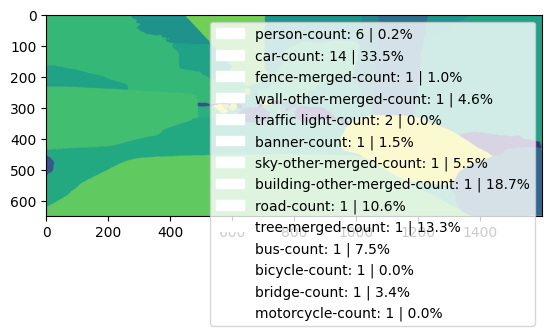

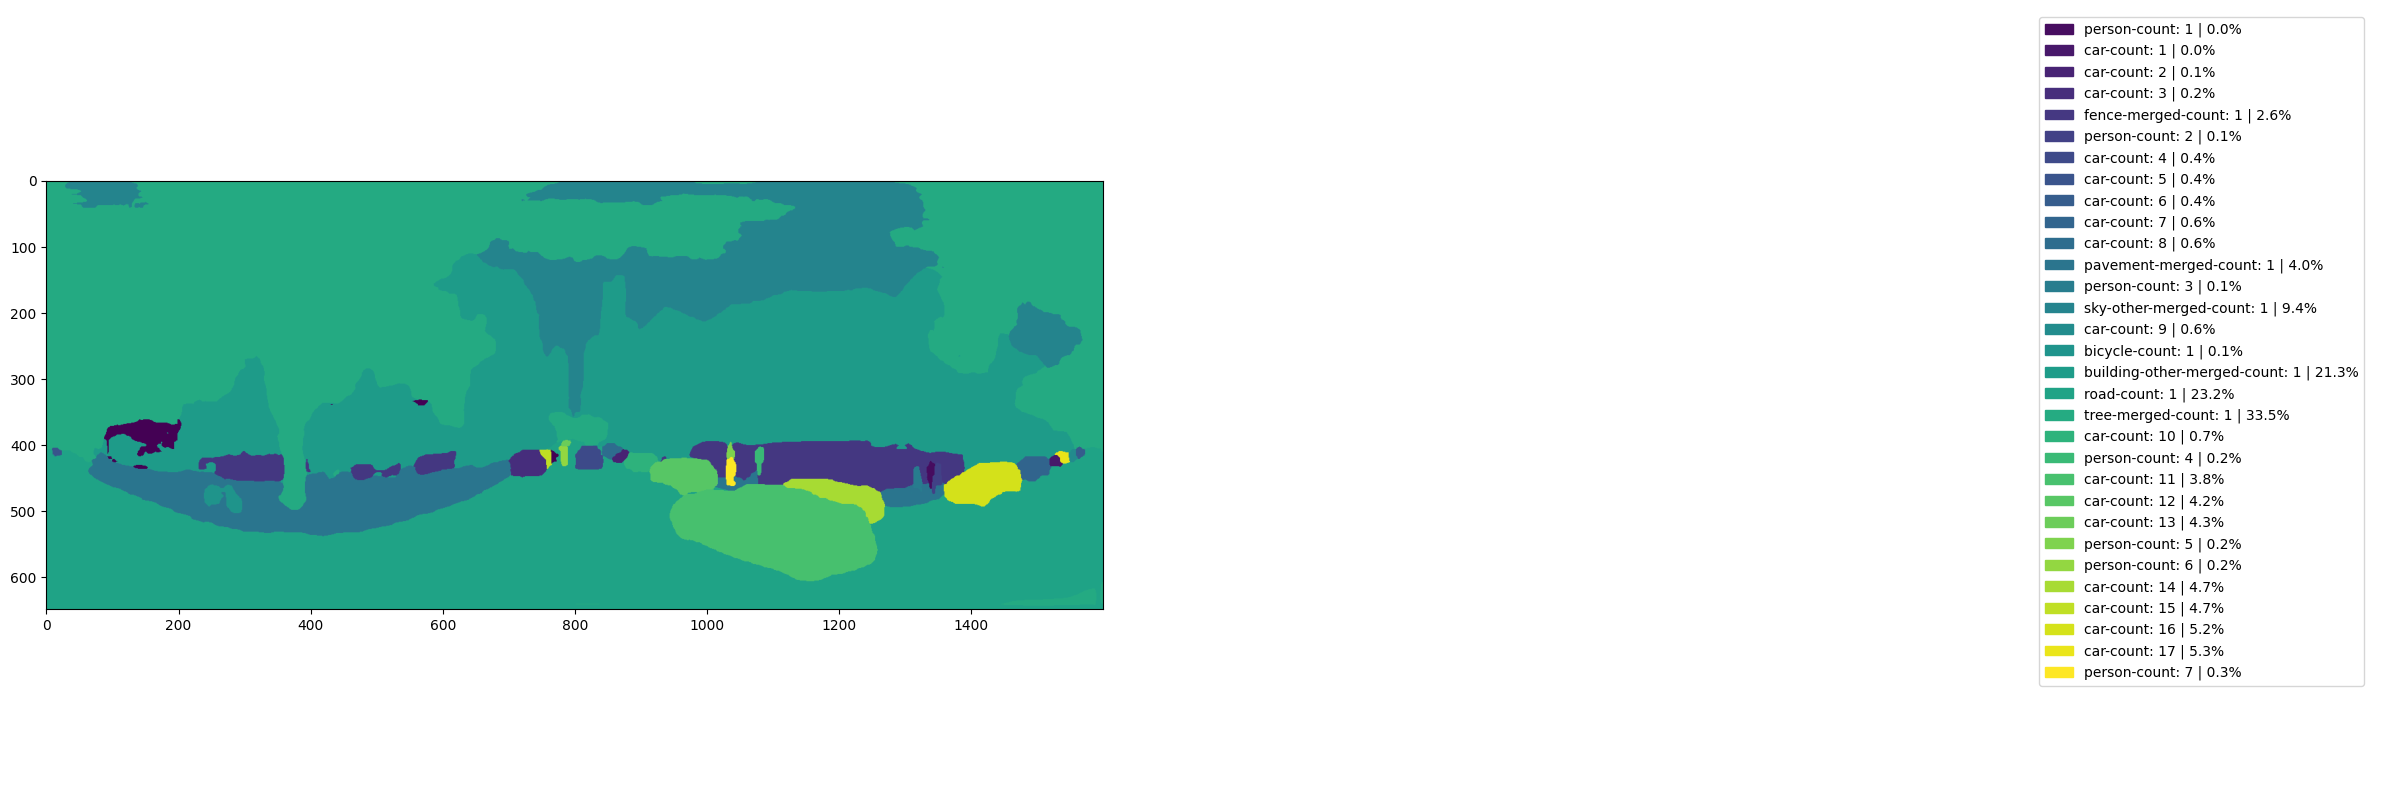

In [ ]:
def draw_panoptic_segmentation(segmentation, segments_info):
    # get the used color map
    max_segment_id = torch.max(segmentation)
    viridis = cm.get_cmap('viridis', max_segment_id + 1)  # Add 1 for zero-indexing
    fig, (ax_image, ax_legend) = plt.subplots(1, 2, figsize=(30, 10))  # Create two subplots side by side

    ax_image.imshow(segmentation)

    # keep track of number of objects
    instances_counter = {}
    instances_counter_names = {}
    instances_shares = {}

    # size of output image
    total_pixels = segmentation.numel()

    handlesLegend = []
    colors = {}
    # for each segment, draw its legend
    for segment in segments_info:
        segment_id = segment['id']
        if segment_id not in segmentation.unique():
            continue  # Skip segments not present in the segmentation

        segment_label_id = segment['label_id']
        # get name associated to label ID
        segment_label = model.config.id2label[segment_label_id]

        # get relative share of objects
        mask_pixels = torch.sum((segmentation == segment_id))
        mask_share = (mask_pixels.item() / total_pixels) * 100

        # count objects
        try:
            instances_counter_names[segment_label] += 1
            instances_shares[segment_label] += round(mask_share, 2)
        except:
            instances_counter_names[segment_label] = 1
            instances_shares[segment_label] = round(mask_share, 2)

        # Get color from the segmented image based on segment ID
        if segment_id not in colors:
            color = viridis(segment_id / max_segment_id)
            colors[segment_id] = color
        else:
            color = colors[segment_id]

        # Create legend patch with corresponding color
        label = f"{segment_label}-count: {instances_counter_names[segment_label]} | {round(instances_shares[segment_label],1)}%"
        handlesLegend.append(mpatches.Patch(color=color, label=label))

    ax_legend.legend(handles=handlesLegend)

    # Remove axis labels and ticks from the legend subplot
    ax_legend.set_axis_off()

    return instances_counter_names, instances_shares, plt

counter_dict, shares_dict, plt_instance = draw_panoptic_segmentation(**img_segmentation_results)


The model is able to distinguish between individual objects. using the instance_counter dictionary we can easily count objects (e.g. number of cars) or compute their relative share (e.g. percentage of greenery).

##<font color='gold'> **S2: DATA STRUCTURING FOR APPLICATION**
</font>

###<font color='Green'> **[** Structuring Data for App**]**
</font>

In [ ]:
from PIL import Image
import requests
from transformers import AutoProcessor
from transformers import AutoModelForUniversalSegmentation
import torch
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import numpy as np
!pip install -U scipy


####<font color='Green'> **[** Function & Loop **]**
</font>

In [ ]:
# load all images from "someSampleImages"
images_for_segmentation = []

for img_url in someSampleImages:
  image = Image.open(requests.get(img_url, stream=True).raw)
  images_for_segmentation.append(image)


In [ ]:
# create a color iamge from segmentationr esults
def tensor_to_segmented_image(segmented_tensor, num_classes=None):
    # Converting PyTorch tensor to a NumPy array
    segmented_array = segmented_tensor.numpy().astype(np.uint8)

    # Assigning a color to each class
    unique_values = np.unique(segmented_array)
    if num_classes is None:
        num_classes = len(unique_values)
    colors = np.random.randint(0, 255, size=(num_classes, 3), dtype=np.uint8)

    # Map unique values in the segmented_array to indices
    value_to_index_map = {value: index for index, value in enumerate(unique_values)}
    mapped_array = np.vectorize(value_to_index_map.get)(segmented_array)

    # Apply colors to the mapped_array
    colored_segmentation = colors[mapped_array]

    # Converting NumPy array to PIL Image
    segmented_image = Image.fromarray(colored_segmentation)
    return segmented_image


In [ ]:
def draw_panoptic_segmentation(segmentation, segments_info):
    # get the used color map
    viridis = cm.get_cmap('viridis', torch.max(segmentation))
    fig, ax = plt.subplots()
    ax.imshow(segmentation)

    # keep track of number of objects
    instances_counter = {}
    instances_counter_names = {}
    instances_shares = {}

    # size of output image
    total_pixels = segmentation.numel()

    handlesLegend = []
    # for each segment, draw its legend
    for segment in segments_info:
        segment_id = segment['id']
        segment_label_id = segment['label_id']
        # get name associated to lable ID
        segment_label = model.config.id2label[segment_label_id]

        # get relative share of objects
        mask_pixels = torch.sum((segmentation == segment_id))
        mask_share = (mask_pixels.item() / total_pixels) * 100

        # count objects
        try:
          instances_counter_names[segment_label] += 1
          instances_shares[segment_label] += round(mask_share,2)
        except:
          instances_counter_names[segment_label] = 1
          instances_shares[segment_label] = round(mask_share, 2)


    # Adjusted Legend
    for k_name, i_num in instances_counter_names.items():
      label = f"{k_name}-count: {i_num} | {round(instances_shares[k_name],1)}%"
      handlesLegend.append(mpatches.Patch(color="white", label=label))

    print(instances_counter_names)
    print(instances_shares)
    ax.legend(handles=handlesLegend)

    # create a PIL image from the tensor/array -> this can be used in gradio mire easially
    segmented_image = tensor_to_segmented_image(segmentation)
    print(segmented_image)

    return instances_counter_names, instances_shares, segmented_image


In [ ]:
def getImageData(img, model, processor):
    # encode image
    image_inputs = processor(images=img, task_inputs=["panoptic"], return_tensors="pt")

    # forward pass
    with torch.no_grad():
        outputs = model(**image_inputs)

    # get results
    img_segmentation_results = processor.post_process_panoptic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]

    # call result processing function
    counter_dict, shares_dict, segmentation_map = draw_panoptic_segmentation(**img_segmentation_results)

    return counter_dict, shares_dict, segmentation_map


##<font color='gold'> **S3: GRADIO APP**
</font>

###<font color='Green'> **[** Launch App**]**
</font>

In [ ]:
!pip install gradio --upgrade
import gradio as gr

In [ ]:
import pandas as pd
import numpy as np

def segment_image(image):
    counter_dict, shares_dict, segmentation_map = getImageData(image,model,processor)

    # Prepare data for the table
    table_data = []
    for class_name in counter_dict.keys():
        instance_count = counter_dict[class_name]
        share = shares_dict[class_name]
        table_data.append([class_name, instance_count, share])

    # Create a pandas DataFrame for the table
    table_df = pd.DataFrame(table_data, columns=["Class Name", "Instance Count", "Share"])

    return segmentation_map, table_df

# Define Gradio input and output components

image_input = gr.Image(label="Input Image")
image_output = gr.Image(type="pil", label="Segmented Image")
table_output = gr.Dataframe(type="pandas", label="Detected Classes")

# Create Gradio interface
iface = gr.Interface(fn=segment_image,
                     inputs=[image_input],
                     outputs=[image_output, table_output],
                     title="Image Segmentation",
                     description="Upload an image to segment it using the pretrained model.")


# Launch the interface
iface.launch(debug=True)



It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://13f28c70f775810699.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py",

{'person': 6, 'car': 14, 'fence-merged': 1, 'wall-other-merged': 1, 'traffic light': 2, 'banner': 1, 'sky-other-merged': 1, 'building-other-merged': 1, 'road': 1, 'tree-merged': 1, 'bus': 1, 'bicycle': 1, 'bridge': 1, 'motorcycle': 1}
{'person': 0.24, 'car': 33.51, 'fence-merged': 1.02, 'wall-other-merged': 4.57, 'traffic light': 0.04, 'banner': 1.54, 'sky-other-merged': 5.45, 'building-other-merged': 18.72, 'road': 10.6, 'tree-merged': 13.26, 'bus': 7.53, 'bicycle': 0.01, 'bridge': 3.44, 'motorcycle': 0.02}
<PIL.Image.Image image mode=RGB size=1600x649 at 0x7B1B3129E660>
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://13f28c70f775810699.gradio.live


In [ ]:
import pandas as pd
import numpy as np
import gradio as gr

def segment_image(image):
    # assumes getImageData(image, model, processor) is defined elsewhere
    counter_dict, shares_dict, segmentation_map = getImageData(image, model, processor)

    # build table
    rows = []
    for cls, count in counter_dict.items():
        rows.append({
            "Class Name": cls,
            "Instance Count": int(count),
            "Share": float(shares_dict.get(cls, 0.0))
        })
    table_df = pd.DataFrame(rows)

    # build bar chart DataFrame (sorted by Share %)
    bar_df = table_df.copy()
    bar_df["Share (%)"] = (bar_df["Share"] * 100).round(1)
    bar_df = bar_df.sort_values("Share (%)", ascending=False)[["Class Name", "Share (%)"]]

    return segmentation_map, table_df, bar_df

# Gradio components
image_input = gr.Image(label="Input Image")
image_output = gr.Image(label="Segmented Image")
table_output = gr.Dataframe(label="Detected Classes")

# horizontal bar chart so text doesn’t overlap
bar_chart_output = gr.BarPlot(
    x="Share (%)",
    y="Class Name",
    vertical=False,
    label="Class Share (%)",
    tooltip=["Class Name", "Share (%)"],
    height=400
)

iface = gr.Interface(
    fn=segment_image,
    inputs=[image_input],
    outputs=[image_output, table_output, bar_chart_output],
    title="Image Segmentation",
    description="Upload an image to segment it using the pretrained model."
)

iface.launch(debug=True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://3cb1dcd3d6e38e273e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py",

{'person': 6, 'car': 14, 'fence-merged': 1, 'wall-other-merged': 1, 'traffic light': 2, 'banner': 1, 'sky-other-merged': 1, 'building-other-merged': 1, 'road': 1, 'tree-merged': 1, 'bus': 1, 'bicycle': 1, 'bridge': 1, 'motorcycle': 1}
{'person': 0.24, 'car': 33.51, 'fence-merged': 1.02, 'wall-other-merged': 4.57, 'traffic light': 0.04, 'banner': 1.54, 'sky-other-merged': 5.45, 'building-other-merged': 18.72, 'road': 10.6, 'tree-merged': 13.26, 'bus': 7.53, 'bicycle': 0.01, 'bridge': 3.44, 'motorcycle': 0.02}
<PIL.Image.Image image mode=RGB size=1600x649 at 0x7B1B301C6D50>
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://3cb1dcd3d6e38e273e.gradio.live
